# Pulses


### Pulses vs Gates

Gates (final destination): Some rotaions that users set.

Pulse (dynamics): The path (evolution) that the system takes to get to that rotation angle.

### Pulses operational definition

* Pulses are complex valued arrays: [${c_0, ..., c_n}$].
* Each complex amplitude is applied for time interval $dt$.
* Ths pulses describe a (global) envelope that is multiplied by a (local) carrier signal.
* The carrier signal is parameterized by two values $(f_i, \phi_i)$. $f_i$ is the carrier frequency, $\phi_i$ is the carrier phase or carrier frame.

#### FAQ

##### 1. What is a carrier signal?

Carrier signals are usually high frequency sine waves. The array defined above is the amplitude modulation of a carrier signal. 


<div>
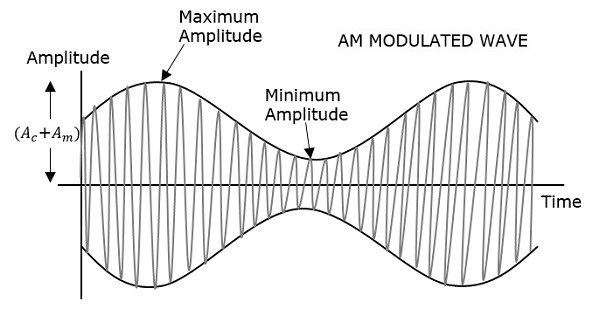
</div>

For example, if users input a Gaussian pulse, what happens in the hardware is

<div>
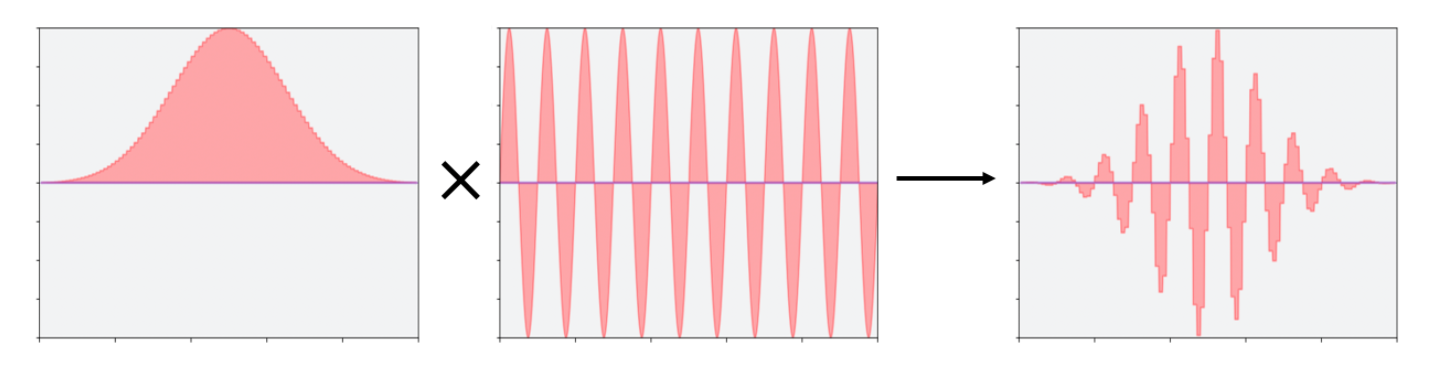
</div>


From this point on, we will not call it a carrier signal anymore, we will call it with its cooler name, a **frame**.

##### 2. What does it mean by having complexed valued pulses?

In practice, the real and imaginary part of the pulses are mixed by an IQ mixer.


<div>
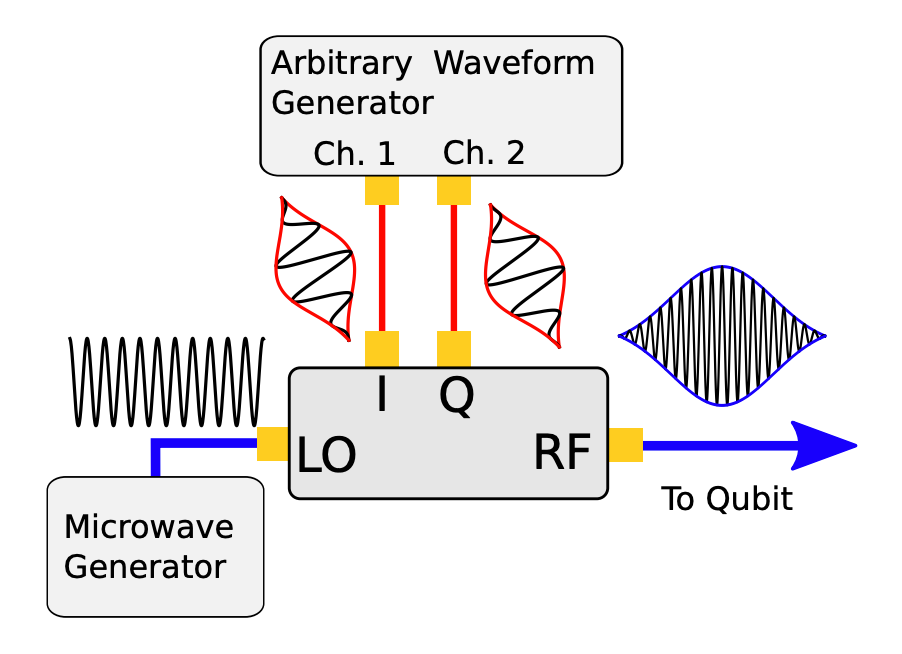
</div>

The output of the IQ mixer is
$V(t) = V_I(t) \cdot \text{cos}(\omega_{LO} t)  +V_Q(t) \cdot \text{sin}(\omega_{LO} t)$.

### Pulse layer in the stack

Pulses are like microcode in computer architecture, which "is a processor design technique that interposes a layer of computer organization between the CPU hardware and the programmer-visible instruction set architecture of the computer."

<div>
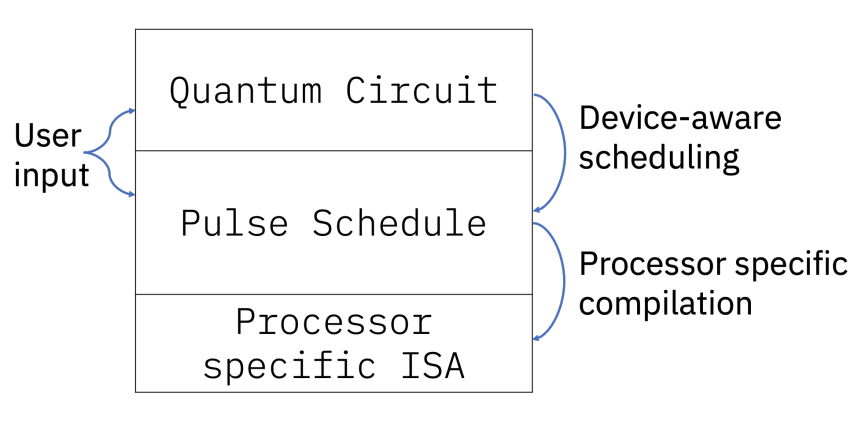
</div>



In [1]:
from qiskit import IBMQ

IBMQ.load_account()
IBMQ.providers()

provider = IBMQ.get_provider(hub="ibm-q-ornl", group="anl", project="csc428")
backend = provider.get_backend('ibmq_paris')

/Users/shiyunon/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


### Backend configurations

In [2]:
config = backend.configuration() # Static backend features
properties = backend.properties() #  Measured and reported backend characteristics
defaults = backend.defaults() # Default settings for the OpenPulse-enabled backend

In [3]:
# print(config.to_dict())
print(defaults)

<PulseDefaults(<InstructionScheduleMap(1Q instructions:
  q0: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q1: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q2: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q3: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q4: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q5: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q6: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q7: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q8: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q9: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q10: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q11: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q12: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q13: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q14: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 'id'}
  q15: {'measure', 'sx', 'u3', 'x', 'u1', 'rz', 'u2', 

In [4]:
print(f'dt={config.dt*1e9}ns') # Figure out the dt

dt=0.2222222222222222ns


In [5]:
from qiskit.visualization import SchedStyle
style = SchedStyle(
    figsize=(6, 4), title_font_size=0, 
    axis_font_size=8, label_font_size=0, icon_font_size=5, 
    table_font_size=5, table_columns=1,
)


#### tl;dr
What channels are to pulses is what qubits are to gates (sort of). The biggest difference between a channel (for pulses) and a qubit (for gates) is that on a channel you can have different frames and frames can overlap (though a lot of times it's not recommended).

## Channels

Channels map to a hardware resource, which can play pulses to manipulate a qubit or capture signal from the qubit to perform a measurement. There is a many-to-many relationship between qubits and channels. One qubit may have multiple channels connecting to it. Pulses on different channels would have different physical interactions with that qubit. A channel may also have many qubits. For instance, a channel could manipulate the coupling between two neighboring qubits, or could even reference multiple qubits in a chain (like multiplexed measurements).

There are two kinds of channels: transmit channels (sending input to a quantum device) and acquisition channels (reading output from a quantum device).

<div>
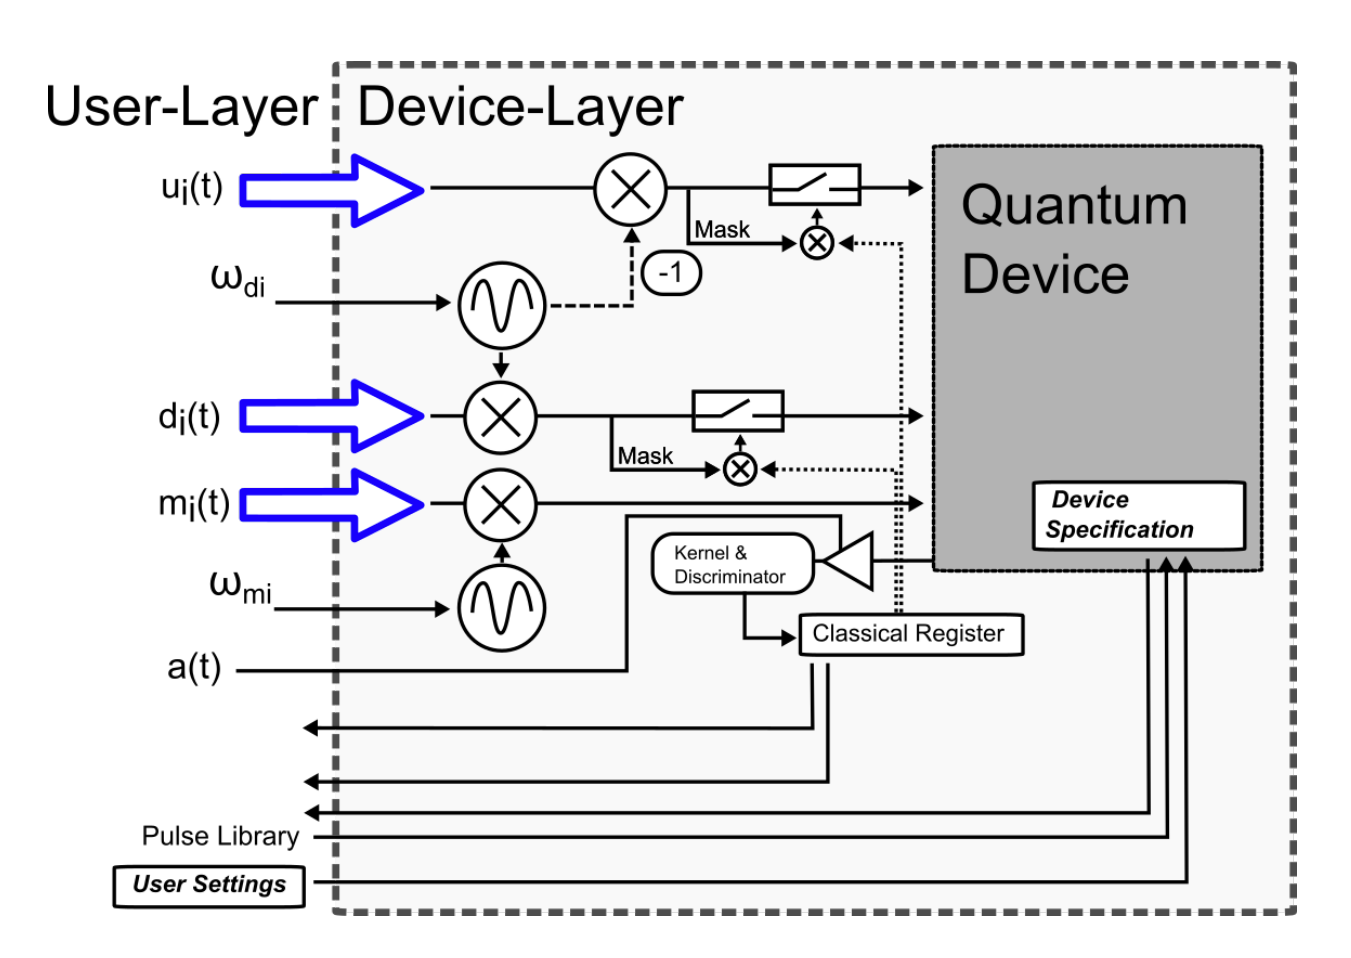
</div>

In the illustration, $\mu_i$ (pulse envelope), $\omega_{di}$ (frame frequency) and $d_i$ (frame amplitude) are sent to the 1-qubit drive channel. $m_i$ (pulse envelope), $\omega_{mi}$ (frame frequency) are sent to the measurement channel. $a_i$ is sent to the acquisition channel.



In [6]:
from qiskit.pulse import DriveChannel

channel = DriveChannel(0) # The number is the index of the qubit.

# There are 4 kinds of channels in openPulse, first 3 are PulseChannel
# DriveChannel: single qubit rotation
# ControlChannel: 2 qubit interaction by Cross-resonance
# MeasureChannel: The pulse applied to readout cavity
# AcquireChannel: collect readout signals

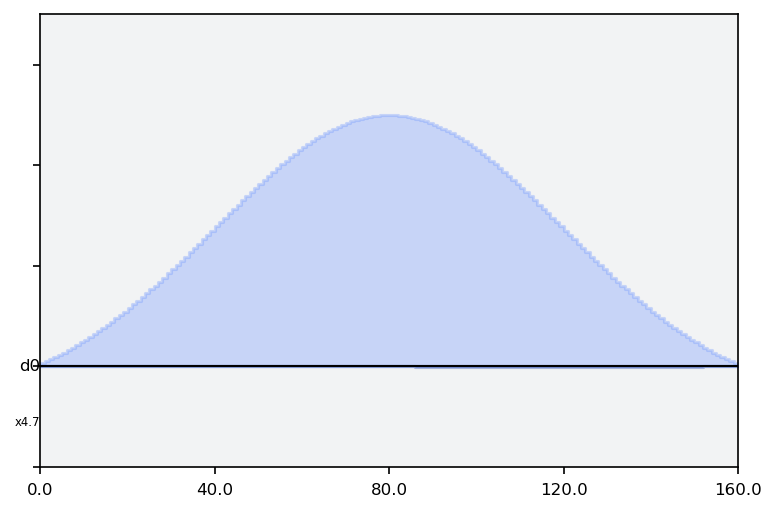

In [22]:
# Get the definition of a CNOT gate
# d0 is the drive channel of qubit 1.
# u0 is the control channel: it drives the 1st qubit in the frequency of the 2nd qubit.
defaults.instruction_schedule_map.get('x', (0)).draw(style=style)

In [24]:
for ins in defaults.instruction_schedule_map.get('x', (0)).instructions:
    print(ins)

(0, Play(Drag(duration=160, amp=(0.21245079501233377+0j), sigma=40, beta=0.134294128078088), DriveChannel(0)))


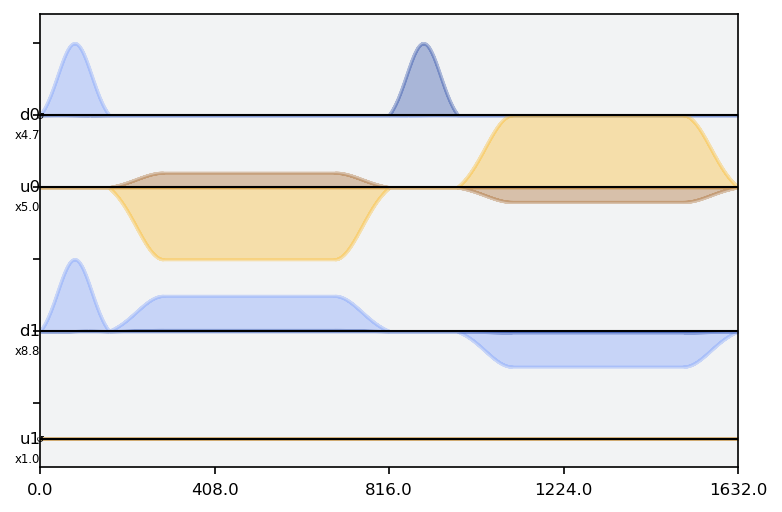

In [7]:
# Get the definition of a CNOT gate
# d0 is the drive channel of qubit 1.
# u0 is the control channel: it drives the 1st qubit in the frequency of the 2nd qubit.
defaults.instruction_schedule_map.get('cx', (0, 1)).draw(style=style)

In [21]:
for ins in defaults.instruction_schedule_map.get('cx', (0, 1)).instructions:
    print(ins)

(0, ShiftPhase(1.5707963267948966, DriveChannel(0)))
(0, ShiftPhase(1.5707963267948966, ControlChannel(1)))
(0, Play(Drag(duration=160, amp=(-3.902657791322475e-17-0.21245079501233377j), sigma=40, beta=0.134294128078088), DriveChannel(0)))
(0, Play(Drag(duration=160, amp=(0.1136620316573493+0.0002370244965729686j), sigma=40, beta=-0.32182133996239964), DriveChannel(1)))
(160, Play(GaussianSquare(duration=656, amp=(0.0559203409636186+0.0020295425388403153j), sigma=64, width=400), DriveChannel(1)))
(160, Play(GaussianSquare(duration=656, amp=(-0.19817800153363704+0.04027724181385234j), sigma=64, width=400), ControlChannel(0)))
(816, Play(Drag(duration=160, amp=(0.21245079501233377+0j), sigma=40, beta=0.134294128078088), DriveChannel(0)))
(976, Play(GaussianSquare(duration=656, amp=(-0.0559203409636186-0.0020295425388403084j), sigma=64, width=400), DriveChannel(1)))
(976, Play(GaussianSquare(duration=656, amp=(0.19817800153363704-0.04027724181385236j), sigma=64, width=400), ControlChannel

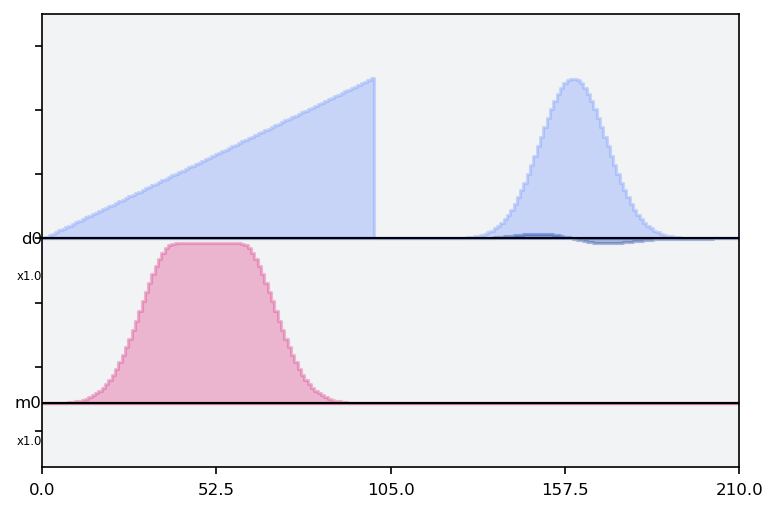

In [104]:
from qiskit import pulse
import numpy as np

d0 = pulse.DriveChannel(0)
m0 = pulse.MeasureChannel(0)

# We create a pulse Schedule using a context manager
with pulse.build(name='my_first_pulse_schedule') as my_first_schedule:
    pulse.play(np.linspace(0, 1, 100), d0)
    pulse.delay(10, d0)
    pulse.play(pulse.Drag(100, 1, 10, 0.5), d0)
    # pulse.barrier(d0, m0)
    pulse.play(measure, m0)
    
my_first_schedule.draw(style=style)

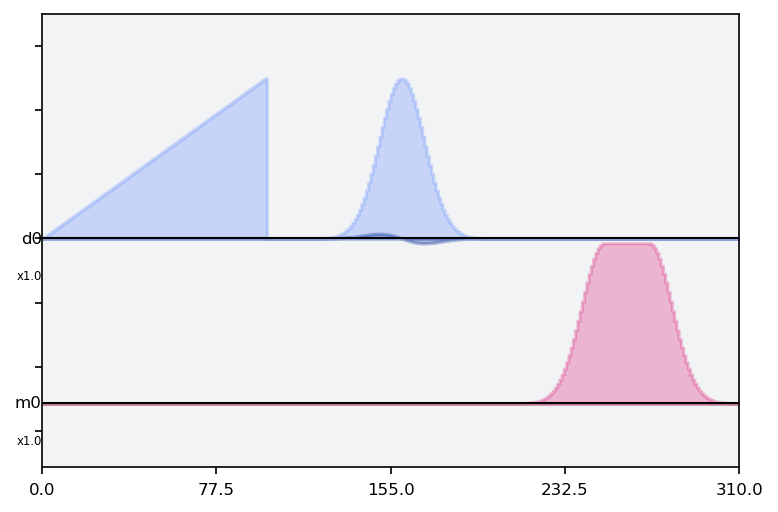

In [102]:
with pulse.build() as sched:
    with pulse.align_sequential():
        pulse.play(np.linspace(0, 1, 100), d0)
        pulse.delay(10, d0)
        pulse.play(pulse.Drag(100, 1, 10, 0.5), d0)
        # pulse.barrier(d0, m0)
        pulse.play(measure, m0)

sched.draw(style=style)

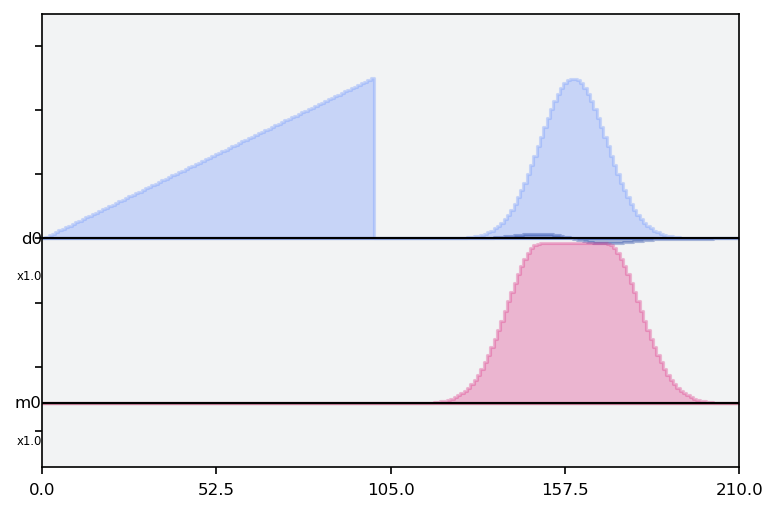

In [103]:
with pulse.build() as sched:
    with pulse.align_right():
        pulse.play(np.linspace(0, 1, 100), d0)
        pulse.delay(10, d0)
        pulse.play(pulse.Drag(100, 1, 10, 0.5), d0)
        # pulse.barrier(d0, m0)
        pulse.play(measure, m0)

sched.draw(style=style)

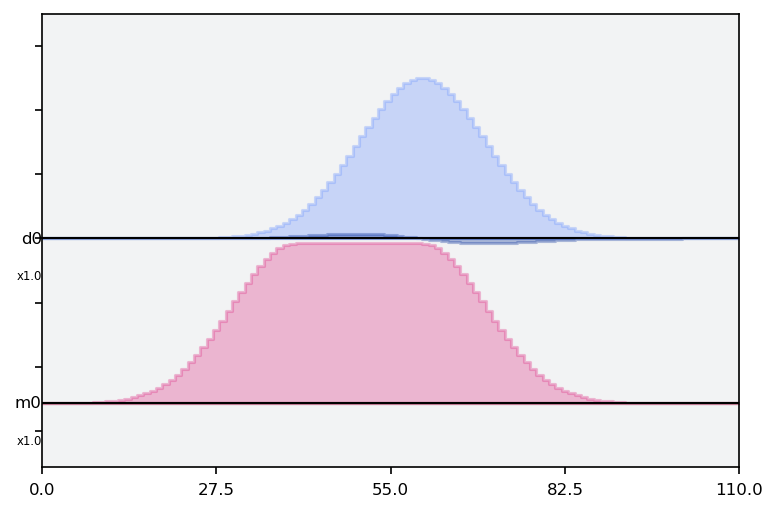

In [99]:
# Another way of creating a pulse Schedule
my_second_schedule = pulse.Schedule(name="my_second_pulse_schedule")

my_second_schedule += pulse.Delay(10, pulse.DriveChannel(0))
my_second_schedule += pulse.Play(pulse.Drag(100, 1, 10, 0.5), pulse.DriveChannel(0))

measure = pulse.GaussianSquare(100, 1, 10, 20)
my_second_schedule += pulse.Play(measure, pulse.MeasureChannel(0))

my_second_schedule.draw(style=style)

(read the following if you are interested)


## How to drive a qubit with pulses


Let's see what happens if we make the time dependent transformation into the rotating frame of the qubit

$$H_{rot} = e^{it \frac{\omega_d}{2} \sigma_z} H e^{-it \frac{\omega_d}{2} \sigma_z} - \frac{\omega_d}{2}\sigma_z$$

Throwing fast oscillating terms (the rotating wave approximation) we will get.

$$H_{rot} = \frac{\omega_q-\omega_d}{2}\sigma_z + \frac{\Omega}{2} d[t] [\cos(\phi)\sigma_x + \sin(\phi) \sigma_y]$$

What does this mean? By setting the drive frequency to be on resonance with the qubit transition $f_d=f_q$, we have $$H_{rot} = \frac{\Omega}{2} d[t] [\cos(\phi)\sigma_x + \sin(\phi) \sigma_y]$$

The qubit evolution will obey the schrodinger equation:
$$i\hbar \frac{d}{dt} |\Psi(t)> = H |\Psi(t)>$$

With the solution assuming a constant pulse $d[t] = A$ 

$$U(T) = e^{-i\frac{\Omega A T}{2}[\cos(\phi)\sigma_x + \sin(\phi) \sigma_y]}$$

Setting $\phi=0$, $\theta= \Omega A T$ we get $Rx(\theta) = e^{-i\theta\sigma_x/2}$ and with $\phi=\pi/2$ we get $Ry(\theta) = e^{-i\theta\sigma_y/2}$

This is universal control over our qubit! By choosing a series of pulses about the X and Y axis of the qubit we can perform an arbitrary rotation.

### Virtual Z-Gate
Incrementing the phase of carrier signal $\phi' = \phi+\pi/2$ will rotate a $\sigma_x -> \sigma_y$ and vice versa. Provided this phase is persistent (ie., for all pulses after it is incremented) this is equivalent to a $R_z(\phi)$. We can get our rotation around the Z-axis virtually for free if we track the phase in hardware. 

This means we only have to calibrate a single pulse with the identity:
$$U(\theta, \phi, \lambda) = R_z(\phi-\pi/2)R_x(\pi/2)R_z(\pi-\theta)R_x(\pi/2)R_z(\lambda-\pi/2)$$

This is known as a [virtual Z-Gate - arxiv.org/1612.00858](https://arxiv.org/pdf/1612.00858.pdf).

In [29]:
# This cell are 2 helper functions

import functools

# decorator generator
# takes the name of the gate, backend and inst_map
def cal(name, qubits, backend, inst_map=None):
    if inst_map is None:
        inst_map = backend.defaults().instruction_schedule_map
    
    # decorator for calibration function
    def wrapper(func):
        @functools.wraps(func)
        def inst_map_wrapper(*args, **kwargs):
            # activate the pulse builder before calling the function
            with pulse.build(backend=backend) as gate:
                output = func(*args, **kwargs)
            return gate
                    
        # register the built sequence
        inst_map.add(name, qubits, inst_map_wrapper)
        return inst_map_wrapper
    return wrapper

In [34]:
from qiskit import pulse

inst_map = pulse.InstructionScheduleMap()


@cal('rz', 0, backend, inst_map=inst_map)
def rz_q0(theta):
    theta = float(theta)
    pulse.shift_phase(-theta, pulse.drive_channel(0))
    for chan in pulse.control_channels(0,  1):
        pulse.shift_phase(-theta, chan)
    
@cal('rz', 1, backend, inst_map=inst_map)
def rz_q1(theta):
    theta = float(theta)
    pulse.shift_phase(-theta, pulse.drive_channel(1))
    for chan in pulse.control_channels(1,  0):
        pulse.shift_phase(-theta, chan)

In [35]:
import numpy as np

inst_map.get('rz', 1, np.pi/2)

Schedule((0, ShiftPhase(-1.5707963267948966, DriveChannel(1))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(1))), name="sched1847")